<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


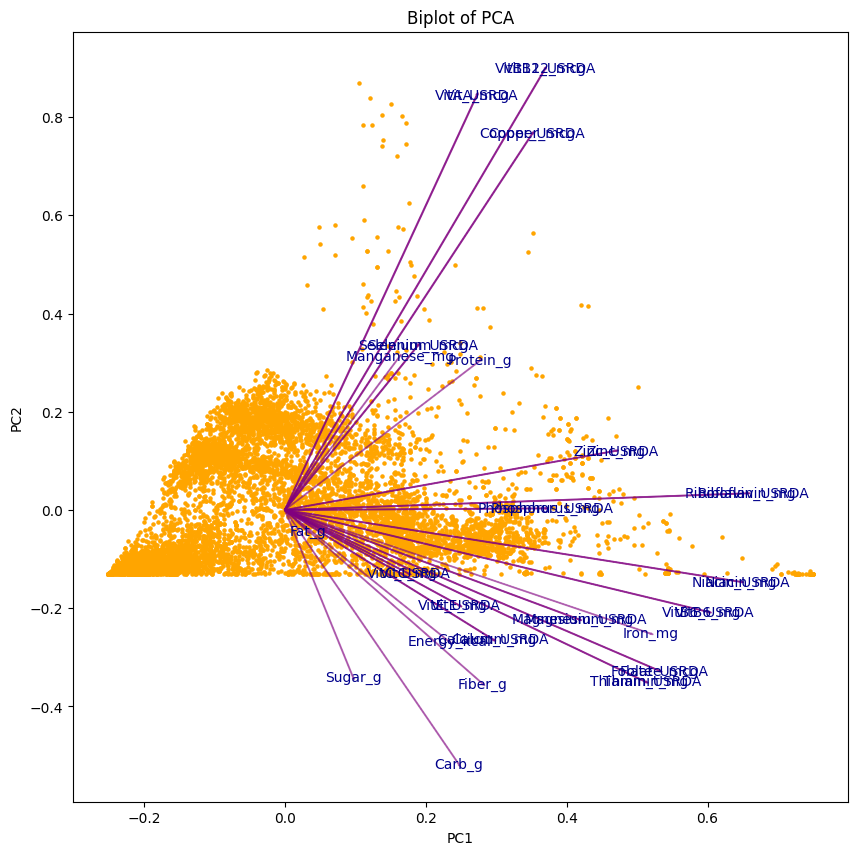

In [4]:
import pandas as pd
df = pd.read_csv("nndb_flat.csv")
df.head()

df.info()

df.drop(["FoodGroup", "ID", "ShortDescrip", "Descrip", "CommonName", "MfgName","ScientificName"], axis=1, inplace=True)

df = df.apply(pd.to_numeric, errors="coerce")

df.dropna(inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

import matplotlib.pyplot as plt
import numpy as np

def biplot(score,coef,labels=None):
  xs = score[:,0]
  ys = score[:,1]
  n = coef.shape[0]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())
  plt.scatter(xs * scalex,ys * scaley, s=5, color='orange')
  for i in range(n):
    plt.arrow(0, 0, coef[i,0]*2.5, coef[i,1]*2.5,color = 'purple', alpha = 0.5)
    plt.text(coef[i,0]* 2.5, coef[i,1] * 2.5, labels[i], color = 'darkblue', ha = 'center', va = 'center')
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))

plt.figure(figsize=(10,10))
plt.title('Biplot of PCA')
biplot(X, np.transpose(pca.components_), list(df.columns))